# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [49]:
## Jupyter Notebook http://localhost:8888/notebooks/WeatherPy/WeatherPy.ipynb
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [50]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [51]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saratamata
City not found. Skipping...
Processing Record 2 of Set 1 | nova sintra
Processing Record 3 of Set 1 | talnakh
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | papatowai
Processing Record 6 of Set 1 | katsuren-haebaru
Processing Record 7 of Set 1 | patterson
Processing Record 8 of Set 1 | rongelap
Processing Record 9 of Set 1 | bilibino
Processing Record 10 of Set 1 | tiksi
Processing Record 11 of Set 1 | fuvahmulah
City not found. Skipping...
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | kimbe
Processing Record 14 of Set 1 | bengkulu
Processing Record 15 of Set 1 | encheng
Processing Record 16 of Set 1 | aasiaat
Processing Record 17 of Set 1 | arraial do cabo
Processing Record 18 of Set 1 | bonthe
Processing Record 19 of Set 1 | west island
Processing Record 20 of Set 1 | howard springs
Processing Record 21 of Set 1 | mount isa
Processi

In [52]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [53]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nova sintra,14.8667,-24.7167,25.50,77,45,3.78,CV,1723137279
1,talnakh,69.4865,88.3972,11.62,61,5,4.84,RU,1723137280
2,bredasdorp,-34.5322,20.0403,11.71,79,23,3.51,ZA,1723137282
3,papatowai,-46.5619,169.4708,6.88,89,99,1.37,NZ,1723137283
4,katsuren-haebaru,26.3369,127.8719,28.43,90,0,2.06,JP,1723137284


In [54]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [55]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nova sintra,14.8667,-24.7167,25.50,77,45,3.78,CV,1723137279
1,talnakh,69.4865,88.3972,11.62,61,5,4.84,RU,1723137280
2,bredasdorp,-34.5322,20.0403,11.71,79,23,3.51,ZA,1723137282
3,papatowai,-46.5619,169.4708,6.88,89,99,1.37,NZ,1723137283
4,katsuren-haebaru,26.3369,127.8719,28.43,90,0,2.06,JP,1723137284


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

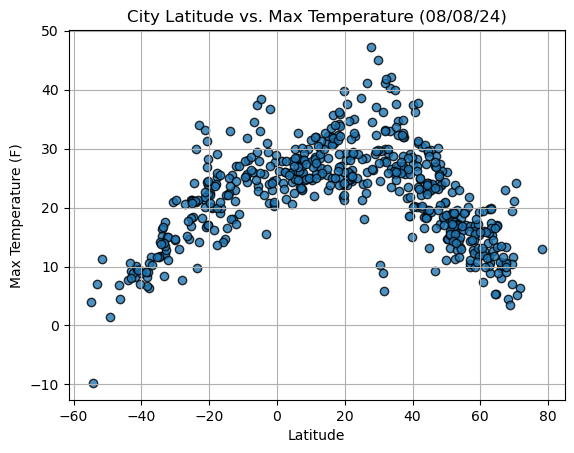

In [56]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

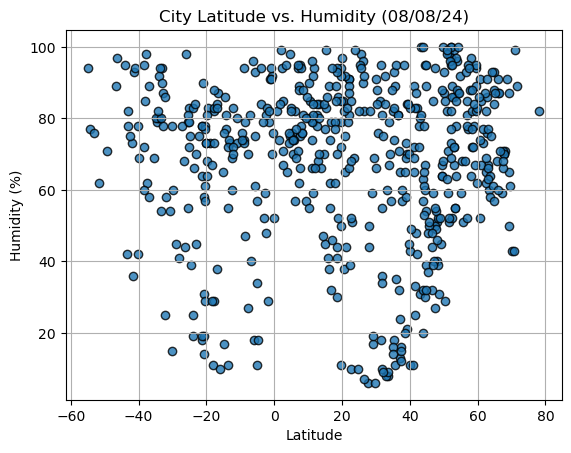

In [57]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], 
            edgecolor='black', linewidths=1, marker='o', 
            alpha=0.8, label='Cities')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (%s)' % time.strftime("%x"))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

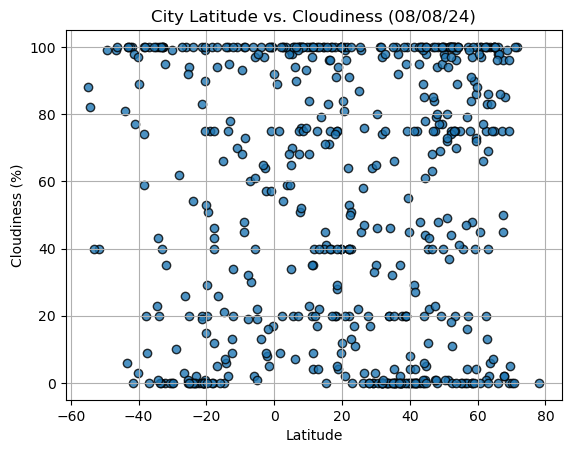

In [58]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'],
            edgecolor='black', linewidths=1, marker='o',
            alpha=0.8, label='Cities')

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (%s)' % time.strftime("%x"))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

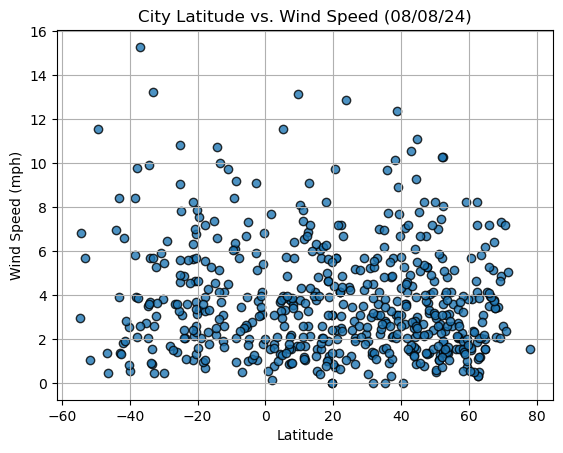

In [59]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'],
            edgecolor='black', linewidths=1, marker='o',
            alpha=0.8, label='Cities')

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (%s)' % time.strftime("%x"))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [60]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title, filename):
    # Calculate the regression line
    (slope, intercept, r_value, _, _) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    
    # Plot scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r-", label=line_eq)
    plt.annotate(line_eq, (x_values.median(), y_values.median()), fontsize=15, color="red")
    
    # Label plot
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    
    # Save the figure
    plt.savefig(filename)
    
    # Show plot
    plt.show()

In [61]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,weno,7.4515,151.8468,27.97,83,75,1.54,FM,1723132404
2,concepcion del oro,24.6333,-101.4167,19.85,36,100,1.77,MX,1723132405
3,college,64.8569,-147.8028,17.11,83,75,2.06,US,1723132406
4,talnakh,69.4865,88.3972,12.71,56,6,5.34,RU,1723132407
5,mount pearl,47.5166,-52.7813,23.58,58,20,9.77,CA,1723132408


In [62]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,bredasdorp,-34.5322,20.0403,11.71,79,23,3.51,ZA,1723137282
3,papatowai,-46.5619,169.4708,6.88,89,99,1.37,NZ,1723137283
9,ushuaia,-54.8000,-68.3000,3.96,94,88,2.96,AR,1723136977
10,kimbe,-5.5502,150.1429,23.74,93,97,2.56,PG,1723137292
11,bengkulu,-3.8004,102.2655,25.74,84,100,2.77,ID,1723137293


###  Temperature vs. Latitude Linear Regression Plot

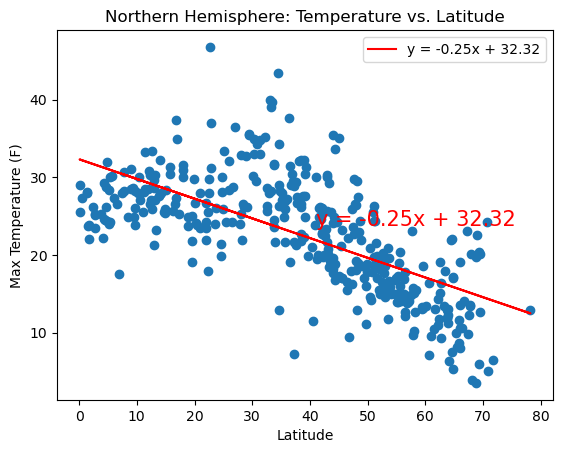

In [63]:
# Linear regression on Northern Hemisphere
plot_linear_regression(
    northern_hemi_df['Lat'], 
    northern_hemi_df['Max Temp'], 
    'Latitude', 
    'Max Temperature (F)', 
    'Northern Hemisphere: Temperature vs. Latitude', 
    'output_data/northern_temp_vs_latitude.png'
)

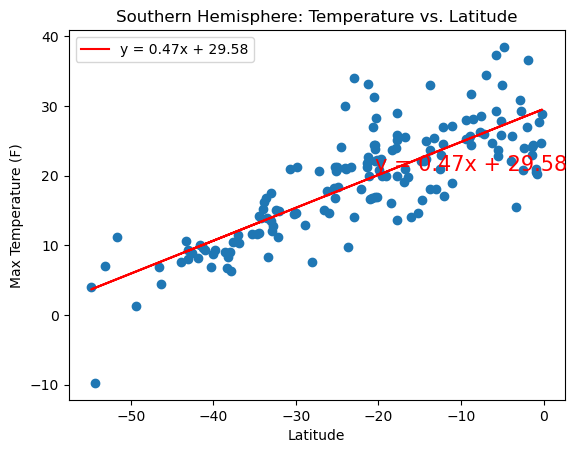

In [64]:
# Linear regression on Southern Hemisphere
plot_linear_regression(
    southern_hemi_df['Lat'], 
    southern_hemi_df['Max Temp'], 
    'Latitude', 
    'Max Temperature (F)', 
    'Southern Hemisphere: Temperature vs. Latitude', 
    'output_data/southern_temp_vs_latitude.png'
)

**Discussion about the linear relationship:** The scatter plot with a linear regression line shows a negative correlation between latitude and temperature, similar to the Northern Hemisphere. In both hemispheres, temperature decreases as latitude increases, moving away from the equator. This linear relationship is fundamental for understanding global climate patterns and planning accordingly.

### Humidity vs. Latitude Linear Regression Plot

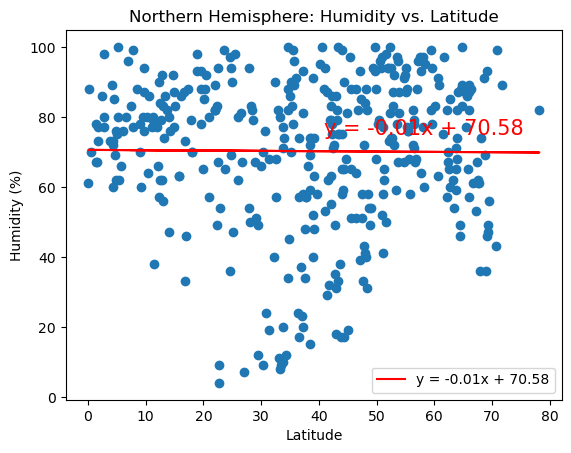

In [65]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df['Lat'], 
    northern_hemi_df['Humidity'], 
    'Latitude', 
    'Humidity (%)', 
    'Northern Hemisphere: Humidity vs. Latitude', 
    'output_data/northern_humidity_vs_latitude.png'
)

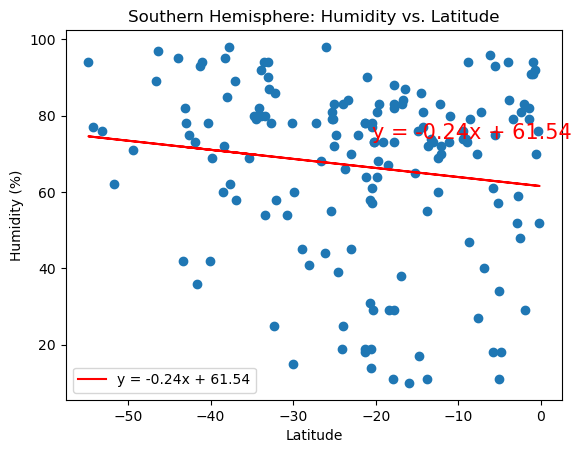

In [66]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df['Lat'], 
    southern_hemi_df['Humidity'], 
    'Latitude', 
    'Humidity (%)', 
    'Southern Hemisphere: Humidity vs. Latitude', 
    'output_data/southern_humidity_vs_latitude.png'
)

**Discussion about the linear relationship:** This weak relationship in the Northern Hemisphere suggests that local factors might have a stronger impact on humidity than latitude. Humidity in the Southern Hemisphere is influenced by factors other than latitude, highlighting the importance of considering local climatic conditions.

### Cloudiness vs. Latitude Linear Regression Plot

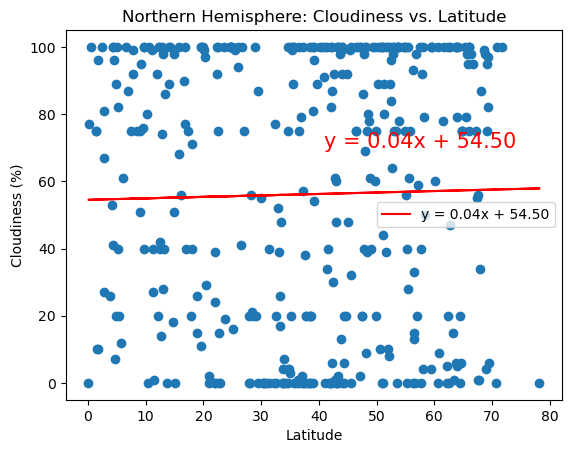

In [67]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df['Lat'], 
    northern_hemi_df['Cloudiness'], 
    'Latitude', 
    'Cloudiness (%)', 
    'Northern Hemisphere: Cloudiness vs. Latitude', 
    'output_data/northern_cloudiness_vs_latitude.png'
)

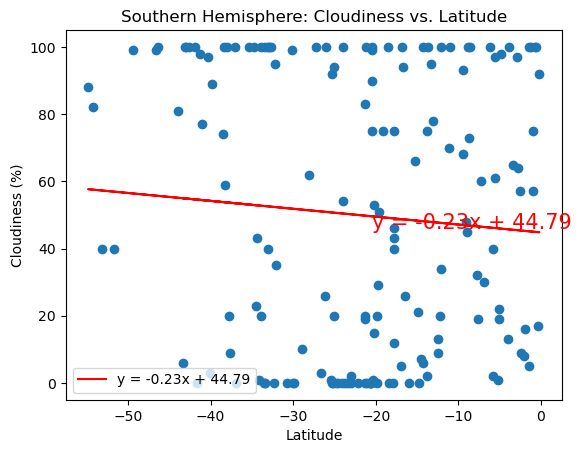

In [68]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df['Lat'], 
    southern_hemi_df['Cloudiness'], 
    'Latitude', 
    'Cloudiness (%)', 
    'Southern Hemisphere: Cloudiness vs. Latitude', 
    'output_data/southern_cloudiness_vs_latitude.png'
)

**Discussion about the linear relationship:** This suggests that cloudiness is influenced more by local weather conditions than by latitude in the Northern Hemisphere. Cloudiness in the Southern Hemisphere is likely influenced by local atmospheric conditions rather than latitude.

### Wind Speed vs. Latitude Linear Regression Plot

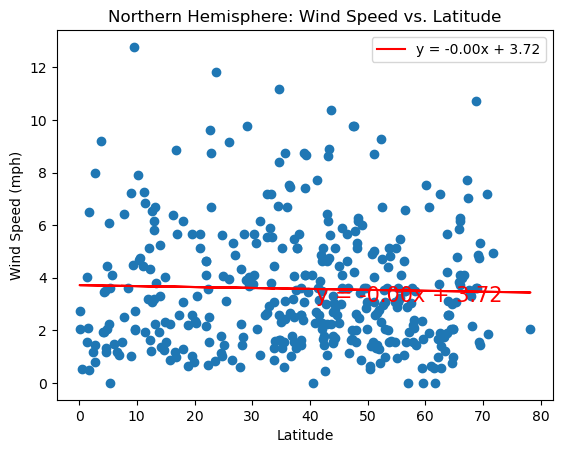

In [69]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df['Lat'], 
    northern_hemi_df['Wind Speed'], 
    'Latitude', 
    'Wind Speed (mph)', 
    'Northern Hemisphere: Wind Speed vs. Latitude', 
    'output_data/northern_windspeed_vs_latitude.png'
)

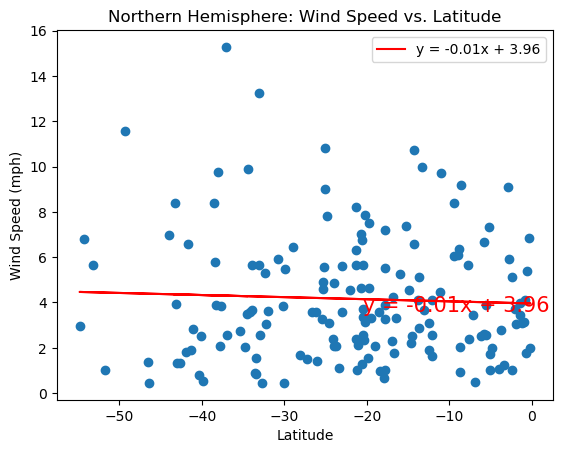

In [70]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df['Lat'], 
    southern_hemi_df['Wind Speed'], 
    'Latitude', 
    'Wind Speed (mph)', 
    'Northern Hemisphere: Wind Speed vs. Latitude', 
    'output_data/northern_windspeed_vs_latitude.png'
)

**Discussion about the linear relationship:** YOUR RESPONSE HERE